In [3]:
# Importação de Bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [4]:
# Leitura de Dados no formato .CSV
bmw = pd.read_csv("bmw.csv", sep=';')
bmw.head() # primeiros 5 registros

,CustomerID,Dealership,Showroom,ComputerSearch,M5,3Series,Z4,Financing,Purchase
0,1,1,0,0,0,0,0,0,0
1,2,1,1,1,0,0,0,1,0
2,3,1,0,0,0,0,0,0,0
3,4,1,1,1,1,0,0,1,1
4,5,1,0,1,1,1,0,1,1


In [ ]:
#0, 1, 0, 0, 1, 0.8, 0.5, 0.45

In [5]:
# Informações quantitativas do dataset: 100 linhas e 9 colunas
bmw.shape

(100, 9)

In [6]:
# Para Agrupamento (clustering), feature "id" não é bem-vinda!
# Vamos excluir o CustomerID..Vamos lá !
# Agora ficará: 0.Dealership, 1.Showroom, 2.ComputerSearch, 3.M5, 4.3Series, 5.Z4, 6.Financing, 7.Purchase
Xbmw = bmw.iloc[:, 1:9].values

In [7]:
# Criação do modelo de Agrupamento (Clustering) usando K-Means
# Parametrizando K-Means com 3 Clusters e Metodo de Inicialização Randômica
kmeans = KMeans(n_clusters = 4, init = 'random')
kmeans

KMeans(init='random', n_clusters=4)

In [8]:
# Treino do modelo com os Dados
kmeans.fit(Xbmw)

KMeans(init='random', n_clusters=4)

In [9]:
# Exibindo os Centroids - São 3 grupos, portanto, 3 linhas com 8 colunas = 8 features
kmeans.cluster_centers_

array([[1.11022302e-16, 1.00000000e+00, 5.00000000e-02, 0.00000000e+00,
        1.00000000e+00, 8.00000000e-01, 5.00000000e-01, 4.50000000e-01],
       [7.63157895e-01, 6.84210526e-01, 2.22044605e-16, 8.94736842e-01,
        3.94736842e-01, 2.10526316e-01, 6.57894737e-01, 4.21052632e-01],
       [5.00000000e-01, 9.37500000e-01, 1.00000000e+00, 1.25000000e-01,
        9.37500000e-01, 5.00000000e-01, 3.12500000e-01, 5.55111512e-17],
       [8.84615385e-01, 4.23076923e-01, 1.00000000e+00, 6.53846154e-01,
        1.92307692e-01, 5.00000000e-01, 8.07692308e-01, 5.38461538e-01]])

In [10]:
# Treinando novamente o modelo com os Dados - Observe que novos Centroids são calculados (inicialização randômica!)
kmeans.fit(Xbmw)

KMeans(init='random', n_clusters=4)

In [11]:
# Exibindo os Centroids - São 3 grupos, portanto, 3 linhas com 8 colunas = 8 features
kmeans.cluster_centers_

array([[7.50000000e-01, 6.25000000e-01, 5.00000000e-01, 8.43750000e-01,
        3.12500000e-01, 3.12500000e-01, 1.00000000e+00, 9.37500000e-01],
       [1.00000000e+00, 5.00000000e-01, 1.00000000e+00, 3.88888889e-01,
        5.00000000e-01, 5.55555556e-01, 3.33333333e-01, 1.11022302e-16],
       [1.11022302e-16, 1.00000000e+00, 3.21428571e-01, 2.22044605e-16,
        1.00000000e+00, 6.78571429e-01, 5.00000000e-01, 3.21428571e-01],
       [8.18181818e-01, 6.81818182e-01, 1.11022302e-16, 8.63636364e-01,
        3.63636364e-01, 2.72727273e-01, 4.09090909e-01, 5.55111512e-17]])

In [12]:
# Executa K-Means para agrupar os dados e retorna Tabela de Distancias (fit_transform)
# Calcula a distância entre os dados de cada linha (instância) e cada um dos 3 clusters
distance = kmeans.fit_transform(Xbmw)
distance

array([[1.54333854, 1.96370152, 1.29518338, 1.91115149],
       [1.51166123, 1.80829112, 1.17366946, 1.53378617],
       [1.54333854, 1.96370152, 1.29518338, 1.91115149],
       [1.30555525, 2.14015457, 1.63630682, 0.92330927],
       [1.61483755, 2.14015457, 1.63630682, 1.07354553],
       [1.692857  , 1.49513679, 1.03802697, 1.96277864],
       [1.80356913, 2.15620665, 1.50913883, 1.11915146],
       [1.88233477, 1.79873122, 0.988686  , 1.91115149],
       [1.58459021, 1.50662429, 1.21552458, 1.68893458],
       [1.77653804, 2.06637769, 1.63630682, 1.11915146],
       [1.692857  , 1.97246202, 1.29518338, 1.46714008],
       [1.7305482 , 2.20366142, 1.08512672, 1.62864975],
       [1.54333854, 2.36225773, 1.60545944, 0.80777472],
       [1.68330234, 1.72034065, 1.17366946, 1.56604598],
       [1.79460401, 1.96370152, 1.13026546, 1.77552809],
       [1.38934551, 1.89215792, 1.66658333, 1.16297033],
       [1.80356913, 2.15620665, 1.50913883, 1.11915146],
       [1.72120278, 2.06637769,

In [13]:
# Para cada uma das 100 linhas do dataset, a qual dos 3 clusters ela pertence..0, 1 ou 2 ?
# São 100 elementos no array, um por linha
labels = kmeans.labels_
labels

array([2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 0, 0, 3, 3,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 2, 2, 3, 3, 0, 0, 1, 3, 0, 2, 0, 0, 0, 0, 0, 3, 0, 2,
       0, 0, 2, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
# Exibindo novamente os Centroids (atualizados) - São 3 grupos, portanto, 3 linhas com 8 colunas = 8 features
kmeans.cluster_centers_

array([[8.70967742e-01, 8.38709677e-01, 3.22580645e-02, 9.35483871e-01,
        3.87096774e-01, 2.25806452e-01, 6.77419355e-01, 3.54838710e-01],
       [0.00000000e+00, 1.00000000e+00, 3.10344828e-01, 3.44827586e-02,
        1.00000000e+00, 6.55172414e-01, 4.82758621e-01, 3.10344828e-01],
       [1.00000000e+00, 4.50000000e-01, 9.00000000e-01, 3.50000000e-01,
        4.50000000e-01, 5.00000000e-01, 3.00000000e-01, 1.11022302e-16],
       [6.50000000e-01, 4.00000000e-01, 7.50000000e-01, 8.00000000e-01,
        2.50000000e-01, 4.50000000e-01, 1.00000000e+00, 9.50000000e-01]])

In [15]:
Xbmw

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 1, 1],
       [1, 0, 1, 1, 1, 0, 1, 1],
       [1, 1, 1, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 1, 1],
       [1, 0, 1, 0, 1, 0, 0, 0],
       [1, 1, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 0],
       [1, 0, 1, 1, 0, 1, 0, 0],
       [1, 0, 1, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 1, 1, 0],
       [1, 0, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 1, 1],
       [1, 0, 1, 0, 0, 0, 1, 1],
       [1, 0, 1, 0, 0, 0, 1, 0],
       [1, 1, 0, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 1, 1],
       [1, 0, 1, 0, 0, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 1, 0],
       [1, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 1, 1, 0, 0],
       [1, 1, 0, 1, 1, 1, 1, 0],
       [1, 1, 0, 1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 0, 1, 1, 1, 1, 0],
       [1,

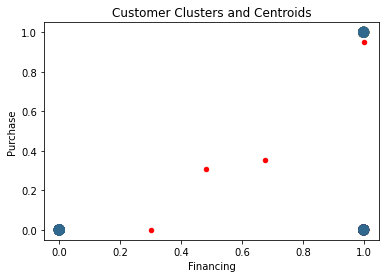

In [16]:
# Visualizando os Clusters - Exemplo 1
# Dados: 0.Dealership, 1.Showroom, 2.ComputerSearch, 3.M5, 4.3Series, 5.Z4, 6.Financing, 7.Purchase
plt.scatter(Xbmw[:, 6], Xbmw[:,7], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 6], kmeans.cluster_centers_[:, 7], s = 20, c = 'red')
plt.title('Customer Clusters and Centroids')
plt.xlabel('Financing')
plt.ylabel('Purchase')
plt.show()

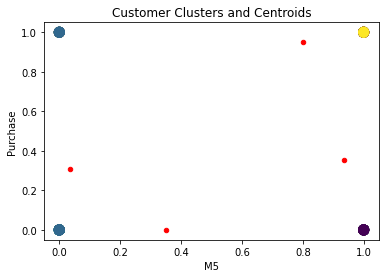

In [17]:
# Visualizando os Clusters - Exemplo 2
# Dados: 0.Dealership, 1.Showroom, 2.ComputerSearch, 3.M5, 4.3Series, 5.Z4, 6.Financing, 7.Purchase
plt.scatter(Xbmw[:, 3], Xbmw[:, 7], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 7], s = 20, c = 'red')
plt.title('Customer Clusters and Centroids')
plt.xlabel('M5')
plt.ylabel('Purchase')
plt.show()

In [18]:
# Cálculo do WCSSE - Within Cluster Sum of Squared Errors
wcsse = []
maxclusters = 11
for i in range(1, maxclusters):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(Xbmw)
    print (i,kmeans.inertia_)
    wcsse.append(kmeans.inertia_)

1 190.6600000000001
2 149.57352941176475
3 126.76137303556656
4 114.6397456208357
5 105.18161764705881
6 96.38336430303973
7 87.84269410350646
8 80.84594155844152
9 73.3963046757165
10 71.11043956043959


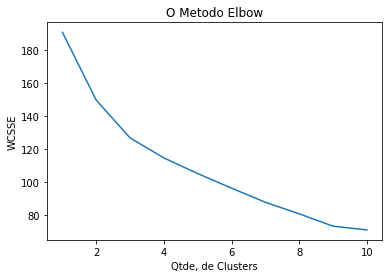

In [19]:
# Plotagem do Gráfico para visualização do "cotovelo" - Método de Elbow
# Ao final do Estudo do Metodo de Elbow a seguir, foram gerados 11 clusters
plt.plot(range(1, maxclusters), wcsse)
plt.title('O Metodo Elbow')
plt.xlabel('Qtde, de Clusters')
plt.ylabel('WCSSE') # Within Cluster Sum of Squares
plt.show()

In [20]:
# Para o cliente 1 => Dealership=1, Showroom=1, ComputerSearch=1, M5=1, 3Series=1,
#                Z4=1, Financing=1, Purchase=1, qual grupo ele pertence?
# O comando predict nos traz o cluster=4
newcustomer1= [ [1, 1, 1, 1, 1, 1, 1, 1] ]
kmeans.predict(newcustomer1)

array([4])

In [21]:
# Para o cliente 2 => Dealership=1, Showroom=0, ComputerSearch=0, M5=0, 3Series=1,
#                Z4=1, Financing=1, Purchase=1, qual grupo ele pertence?
# O comando predict nos traz o cluster=2
newcustomer2 = [ [1, 0, 0, 0, 1, 1, 1, 1] ]
kmeans.predict(newcustomer2)

array([5])